# Esercitazione di Laboratorio n. 4

#### Autore: Davide Cernuzio

Questa esercitazione è incentrata sull’applicazione di alcuni metodi numerici per risolvere equazioni differenziali ordinarie del primo ordine.

### Parte I: Algoritmo di Eulero

Risolvere l'equazione differenziale

$\displaystyle \large \begin{cases} \displaystyle \frac{dy}{dx} = f(x,y) = x + y \\ \\ y(0) = 1 \end{cases}$

con il metodo di Eulero. Graficare la soluzione numerica e confrontarla con quella analitica

$\large y(x) = -(x+1) + c \ e^x \;\;\;$ ove $\large \;\;\; c = (x_0 + y_0 + 1) \; e^{-x_0}$

nel dominio $[0,1]$. Valutare l'errore globale.

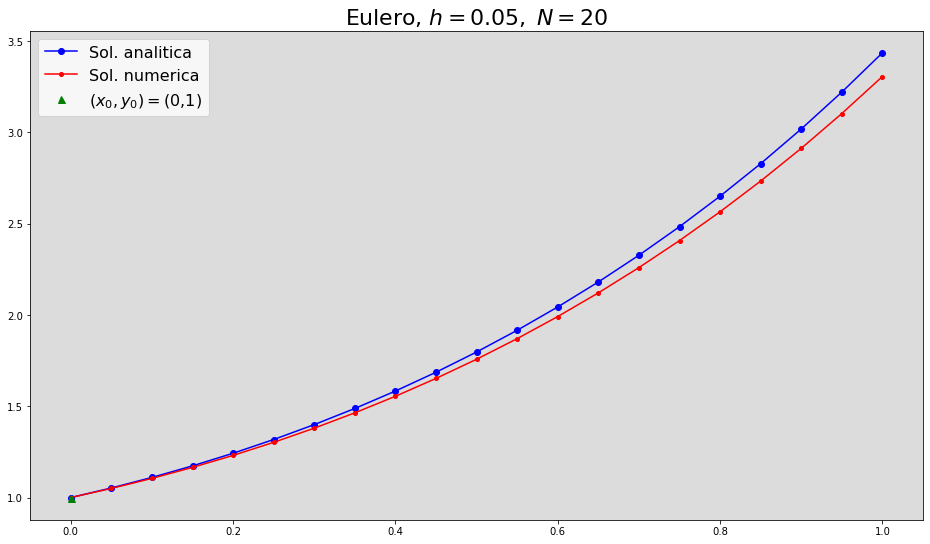

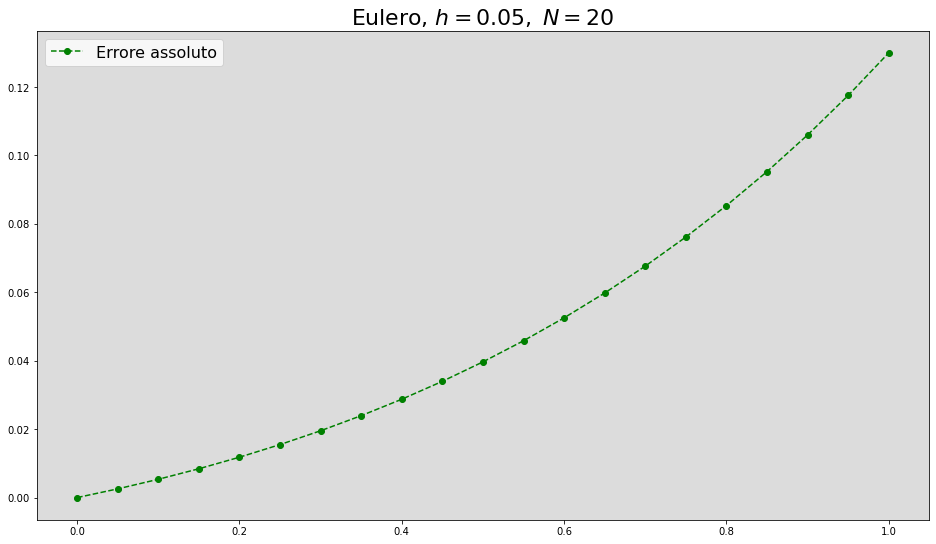

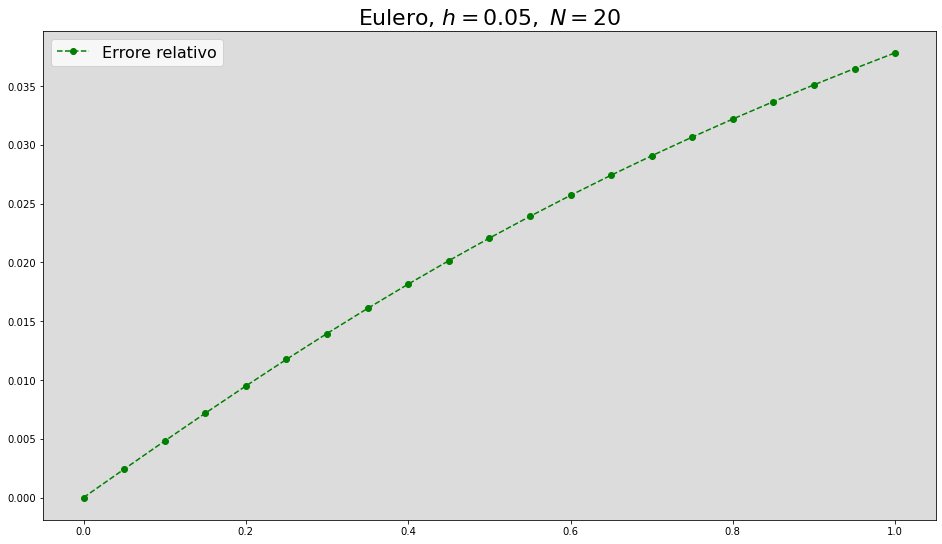

Tempo di esecuzione: t = 0.668 s
Errore max assoluto: E = -0.12997


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
t=time()

x0, x_fin = 0, 1
y0 = 1

c   = (y0 + x0 + 1) * np.exp(-x0)
sol = lambda x: -(x + 1) + c*np.exp(x)
f   = lambda x,y: x+y


def Euler(h = .05):
    
    global h0, N, X, Y_num, Err, Emax
    h0 = h
    N  = int( round((x_fin - x0)/h, 0))
    
    X      = np.append([x0], np.empty(N))
    Y_num  = np.append([y0], np.empty(N))
    Err    = np.append([0] , np.empty(N))
    
    y_k, Emax = y0, 0
    for k in range(1, N+1):
        x_k = x0 + (k-1)*h    
        y_k = y_k + h*f(x_k, y_k)
        e_k = y_k - sol(x_k + h)

        X[k]     = x_k + h
        Y_num[k] = y_k
        Err[k]   = abs(e_k)
        if abs(e_k) > abs(Emax):
            Emax = e_k

Euler()
Y_anal = sol(X)


plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Eulero, $h = '+str(h0)+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Y_anal,'o-b', label='Sol. analitica')
plt.plot(X, Y_num, 'o-r', ms=4, label='Sol. numerica')
plt.plot([x0],[y0],'^ g', ms=7, label='$(x_0,y_0) = ($' +str(round(x0,3))+ ',' + str(round(y0,3))+')')
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Eulero, $h = '+str(h0)+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Err, 'o--g', label='Errore assoluto')
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Eulero, $h = '+str(h0)+', \; N = '+str(N)+'$', size=22)
plt.plot(X, Err/Y_anal, 'o--g', label='Errore relativo')
plt.legend(fontsize=16)
plt.show()


del X, Y_anal, Y_num, Err

t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s')
print('Errore max assoluto: E =', round(Emax,5))

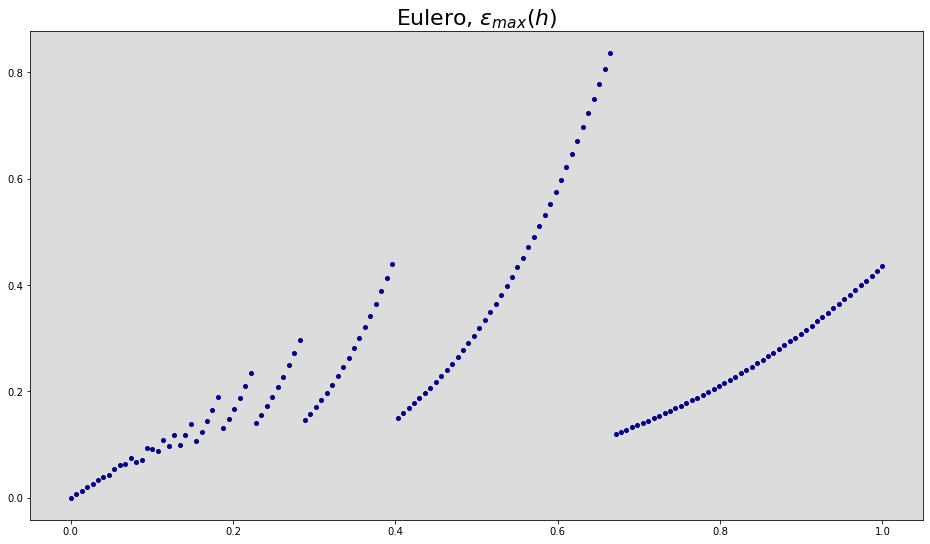

Tempo di esecuzione: t = 0.384 s


In [7]:
#Andamento dell'errore globale al variare di h

t=time()

h1, h2 = 10**(-4), 10**(0)
n_h = 150

h_array = np.linspace(h1, h2, n_h)
Emax_array = np.empty(n_h)

for k in range(n_h):
    Euler( h_array[k] )
    Emax_array[k] = abs(Emax)

plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title('Eulero, $\epsilon_{max}(h)$', size=22)
plt.plot(h_array, Emax_array, 'o', c='darkblue', ms=4)
plt.show()


del h_array, Emax_array

t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s')